In [46]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')

In [47]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [48]:
pciat_col = [col for col in df.columns if 'PCIAT' in col]
df.rename(columns={col: col.replace('PCIAT', 'IAT') for col in pciat_col}, inplace=True)

## **EDA & PREPROCESSING**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [50]:
df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,IAT-Season,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_c = df.copy()
# Drop the 'id' column as it is not needed for analysis
df_c.drop(columns=['id'], inplace=True)

In [52]:
season_columns = [col for col in df_c.columns if 'Season' in col]
# drop season_columns
df_c.drop(columns=season_columns, inplace=True)
df_c.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,3.0,2.0
1,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,2.340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,64.0,0.0,0.0
2,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,5.0,7.0,33.0,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.170,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,38.0,54.0,2.0,0.0
3,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,6.0,9.0,37.0,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,2.451,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,31.0,45.0,0.0,1.0
4,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **HANDLING DUPLICATED VALUE**

In [53]:
df_c.duplicated().sum()

np.int64(399)

In [54]:
duplicated_rows = df_c[df_c.duplicated(keep=False)]
duplicated_rows.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
8,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
9,19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
19,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [55]:
duplicated_rows[duplicated_rows['Basic_Demos-Age'] == 12].head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
14,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
73,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
107,12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


Based on observations, duplicated value occur because there's lot of missing value.
So, for this step we do nothing because we just focus on handling missing value

### **MISSING VALUE & FEATURE ENGINEERING**

In [56]:
# check proportion of missing values in each column
missing_columns = pd.DataFrame({
    'column': df_c.columns,
    'missing': (df_c.isnull().sum() / len(df_c) * 100).to_list()
})
missing_columns.sort_values(by='missing', ascending=False, inplace=True)

with pd.option_context('display.max_rows', None):
    display(missing_columns)

,column,missing
43,PAQ_A-PAQ_A_Total,88.005051
12,Fitness_Endurance-Time_Sec,81.313131
11,Fitness_Endurance-Time_Mins,81.313131
10,Fitness_Endurance-Max_Stage,81.237374
6,Physical-Waist_Circumference,77.323232
16,FGC-FGC_GSND_Zone,73.181818
18,FGC-FGC_GSD_Zone,73.156566
15,FGC-FGC_GSND,72.878788
17,FGC-FGC_GSD,72.878788
44,PAQ_C-PAQ_C_Total,56.540404


**Columns Fitness endurance, FGC, and PAQ have missing value more than 50%,
So better to drop it**

In [57]:
sii = 'sii'

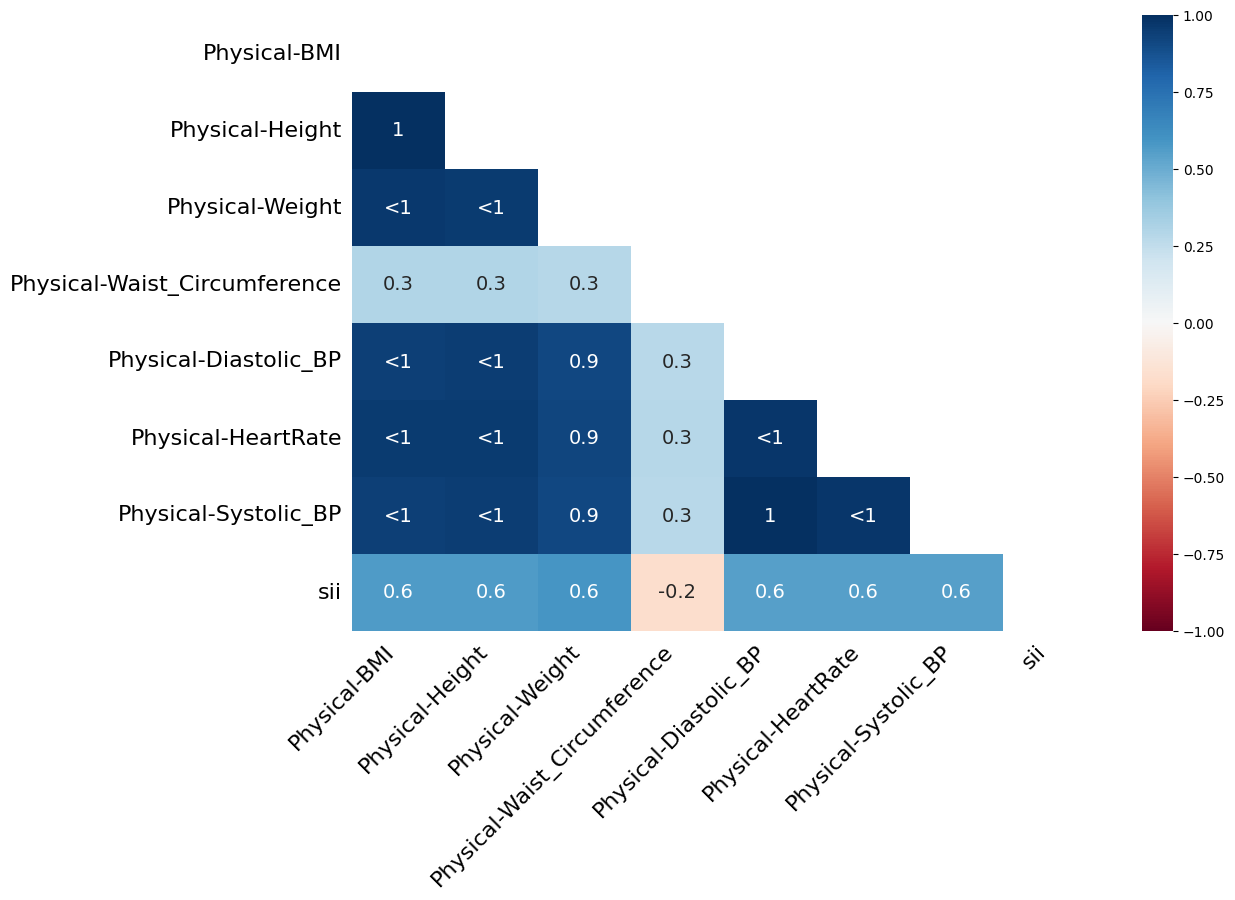

In [58]:
age_column = 'Basic_Demos-Age'
# review missing value in physical measurements
physical_columns = [col for col in df_c.columns if 'Physical' in col]
physical_columns.append(age_column)
physical_columns.append(sii)
# visualize missing values in physical measurements
msno.heatmap(df_c[physical_columns], figsize=(12, 8))
plt.show()

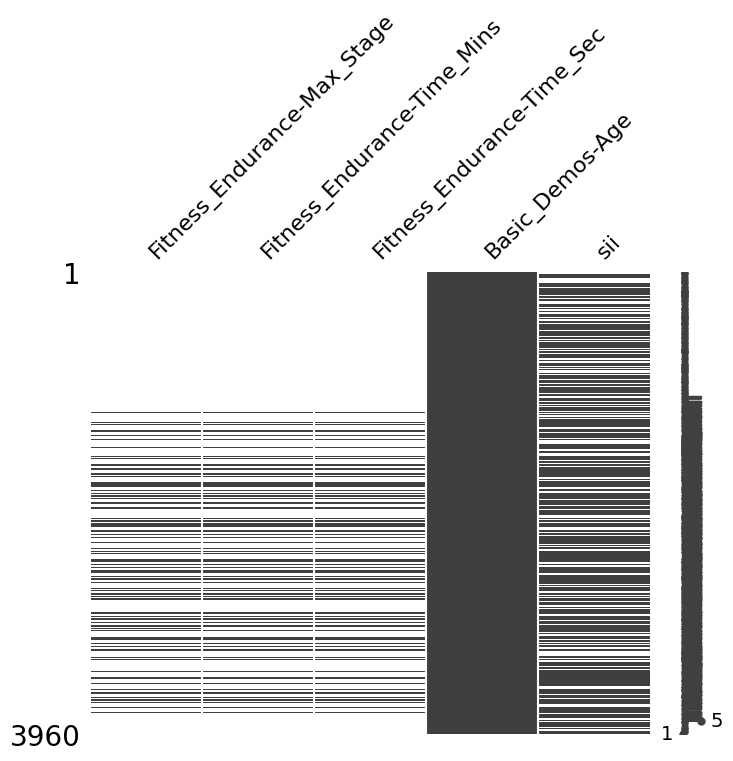

In [59]:
# review missing value in fitness measurements
fitness_columns = [col for col in df_c.columns if 'Fitness' in col]
fitness_columns.append(age_column)
fitness_columns.append(sii)
# visualize missing values in fitness measurements
msno.matrix(df_c[fitness_columns].sort_values(by='Basic_Demos-Age', ascending=False), figsize=(8, 6))
# msno.heatmap(df_c[fitness_columns], figsize=(12, 8))
plt.show()

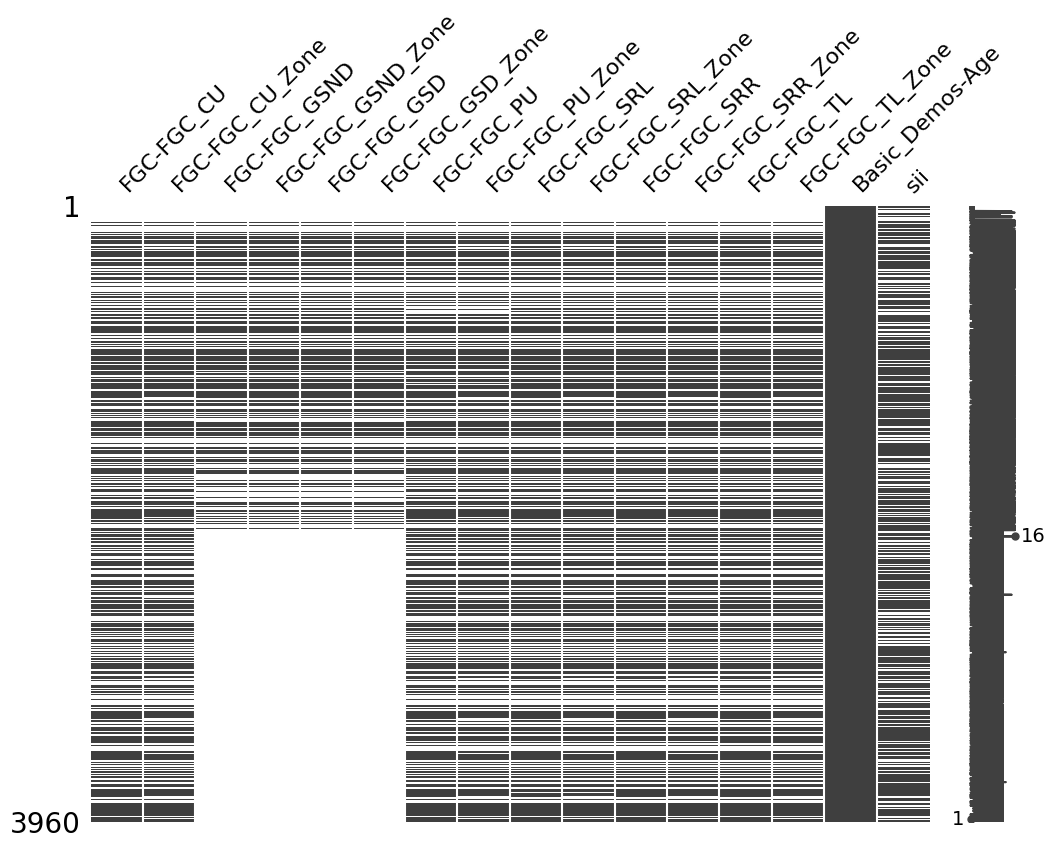

In [60]:
# review missing columns in FGC (Fitness Gram Child) columns 
fgc_columns = [col for col in df_c.columns if 'FGC' in col]
fgc_columns.append(age_column)
fgc_columns.append(sii)
# visualize missing values in FGC columns
msno.matrix(df_c[fgc_columns].sort_values(by='Basic_Demos-Age', ascending=False), figsize=(12, 8))
plt.show()

Drop column with missing value >50%

In [61]:
missing_50 = missing_columns[missing_columns['missing'] > 50]
# drop columns with more than 50% missing values
df_c.drop(columns=missing_50['column'], inplace=True)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   CGAS-CGAS_Score                         2421 non-null   float64
 3   Physical-BMI                            3022 non-null   float64
 4   Physical-Height                         3027 non-null   float64
 5   Physical-Weight                         3076 non-null   float64
 6   Physical-Diastolic_BP                   2954 non-null   float64
 7   Physical-HeartRate                      2967 non-null   float64
 8   Physical-Systolic_BP                    2954 non-null   float64
 9   FGC-FGC_CU                              2322 non-null   float64
 10  FGC-FGC_CU_Zone                         2282 non-null   floa

In [62]:
df_c.iloc[:, 2:].head()

,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,0.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,3.0,2.0
1,NaN,14.035590,48.0,46.0,75.0,70.0,122.0,3.0,0.0,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,64.0,0.0,0.0
2,71.0,16.648696,56.5,75.6,65.0,94.0,117.0,20.0,1.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,38.0,54.0,2.0,0.0
3,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,18.0,1.0,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,31.0,45.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
numeric_df = df_c.iloc[:, 2:].select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

# Display high correlation pairs
if high_corr_pairs:
    for col1, col2, corr_val in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{col1} <-> {col2}: {corr_val:.3f}")
else:
    print("No high correlations found (threshold: |correlation| > 0.7)")



BIA-BIA_BMR <-> BIA-BIA_FFM: 1.000
BIA-BIA_BMR <-> BIA-BIA_TBW: 1.000
BIA-BIA_FFM <-> BIA-BIA_TBW: 1.000
BIA-BIA_ECW <-> BIA-BIA_FFM: 0.999
BIA-BIA_BMR <-> BIA-BIA_ECW: 0.999
BIA-BIA_ECW <-> BIA-BIA_TBW: 0.999
BIA-BIA_FFM <-> BIA-BIA_LDM: 0.999
BIA-BIA_BMR <-> BIA-BIA_LDM: 0.999
BIA-BIA_ICW <-> BIA-BIA_TBW: 0.998
BIA-BIA_ECW <-> BIA-BIA_LDM: 0.997
BIA-BIA_BMR <-> BIA-BIA_ICW: 0.997
BIA-BIA_FFM <-> BIA-BIA_ICW: 0.997
BIA-BIA_LDM <-> BIA-BIA_TBW: 0.997
BIA-BIA_ICW <-> BIA-BIA_SMM: 0.997
BIA-BIA_ICW <-> BIA-BIA_LST: 0.996
SDS-SDS_Total_Raw <-> SDS-SDS_Total_T: 0.996
BIA-BIA_ECW <-> BIA-BIA_ICW: 0.994
BIA-BIA_LST <-> BIA-BIA_TBW: 0.994
BIA-BIA_LST <-> BIA-BIA_SMM: 0.994
BIA-BIA_BMC <-> BIA-BIA_LDM: 0.994
BIA-BIA_SMM <-> BIA-BIA_TBW: 0.993
BIA-BIA_DEE <-> BIA-BIA_TBW: 0.993
BIA-BIA_BMR <-> BIA-BIA_DEE: 0.993
BIA-BIA_DEE <-> BIA-BIA_FFM: 0.993
BIA-BIA_ICW <-> BIA-BIA_LDM: 0.993
BIA-BIA_DEE <-> BIA-BIA_ICW: 0.993
BIA-BIA_BMR <-> BIA-BIA_SMM: 0.992
BIA-BIA_FFM <-> BIA-BIA_SMM: 0.992
BIA-BIA_BM

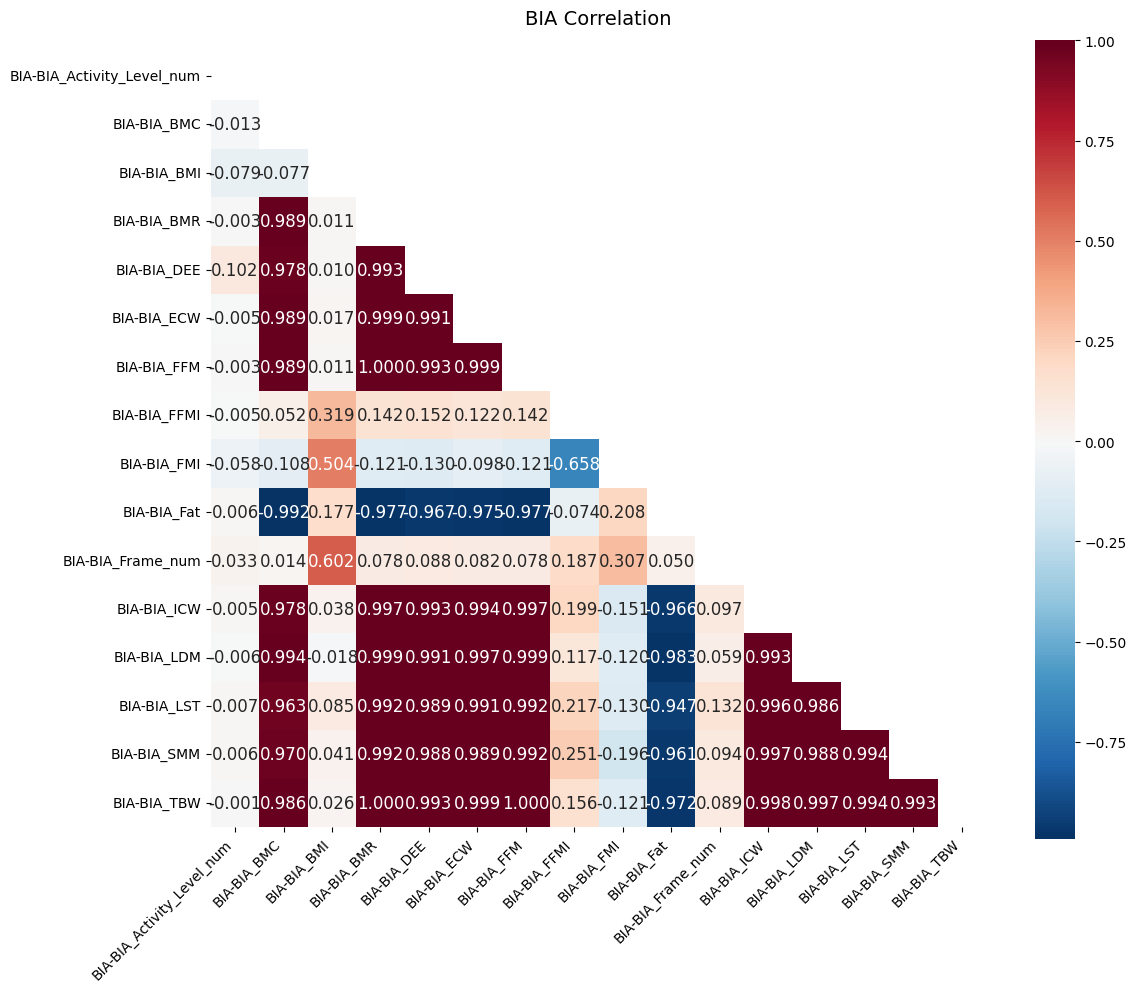

In [64]:
# handling BIA group 
BIA_group = [col for col in df_c.columns if 'BIA' in col]
# visualize BIA correlation 
corr_matrix = df_c[BIA_group].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
           annot=True, 
           fmt='.3f', 
           cmap='RdBu_r', 
           center=0,           
           square=True,
           xticklabels=True,
           yticklabels=True,
           mask=mask,
           annot_kws={'size': 12})

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('BIA Correlation', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [65]:
# drop high correlated in BIA group except for Fat Free Mass
BIA_group = [col for col in BIA_group if col != 'BIA-BIA_FFM']
df_c.drop(columns=BIA_group, inplace=True)

In [66]:
# average for sit and reach 
sit_reach_columns = ['FGC-FGC_SRL', 'FGC-FGC_SRR']
df_c['FGC-FGC_Sit_Reach'] = df_c[sit_reach_columns].mean(axis=1)
df_c.drop(columns=sit_reach_columns, inplace=True)

# for zone
sit_reach_zone = ['FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone']
df_c['FGC-FGC_Sit_Reach_Zone'] = df_c[sit_reach_zone].mode(axis=1)[0]
df_c.drop(columns=sit_reach_zone, inplace=True)

In [67]:
# handling for physical attributes 
df_c.drop(columns=['Physical-Diastolic_BP', 'Physical-Systolic_BP'], inplace=True)

In [68]:
# handling FGC columns 
fgc_columns = [col for col in df_c.columns if 'FGC' in col]
fgc_columns.append('sii')
# check correlation FGC to sii 
fgc_corr = df_c[fgc_columns].dropna().corr()['sii'].sort_values(ascending=False)
len(fgc_corr)

9

In [69]:
fgc_less_cor = fgc_corr[fgc_corr < 0.2].index.tolist()
len(fgc_less_cor)

7

Based on observations, Fitness Grams have low correlation to sii (target variable)
So, it's better to drop variable to prevent noise in data


In [70]:
columns_to_check = ['CGAS-CGAS_Score','Physical-BMI','Physical-HeartRate','BIA-BIA_FFM']
corr = df_c[columns_to_check+['sii']].dropna().corr().sort_values(ascending=False, by='sii')
less_corr = corr[corr['sii'] < 0.2].index.tolist()
less_corr

['BIA-BIA_FFM', 'Physical-HeartRate', 'CGAS-CGAS_Score']

In [71]:
df_c.drop(columns=fgc_less_cor+less_corr, inplace=True)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   Physical-BMI                            3022 non-null   float64
 3   Physical-Height                         3027 non-null   float64
 4   Physical-Weight                         3076 non-null   float64
 5   FGC-FGC_CU                              2322 non-null   float64
 6   IAT-IAT_01                              2733 non-null   float64
 7   IAT-IAT_02                              2734 non-null   float64
 8   IAT-IAT_03                              2731 non-null   float64
 9   IAT-IAT_04                              2731 non-null   float64
 10  IAT-IAT_05                              2729 non-null   floa

In [72]:
# check mutual information for less correlated columns before dropping
from sklearn.feature_selection import mutual_info_classif

less_corr = ['Physical-BMI','FGC-FGC_CU']
X = df_c[less_corr]
y = df_c['sii']

X_filled = X.fillna(X.mean())
y_filled = y.fillna(y.mode()[0])  # Fill missing target values with the mode
mi = mutual_info_classif(X_filled, y_filled, discrete_features=True, random_state=42)
mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=False)


d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Physical-BMI    0.683037
FGC-FGC_CU      0.052945
dtype: float64

based on mutual info selection, Physical-BMI got socre more than 0,5. It explain Physical-BMI can considered not to drop rather than FGC-FGC_CU feature

In [73]:
df_c.drop(columns='FGC-FGC_CU', inplace=True)

In [74]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   Physical-BMI                            3022 non-null   float64
 3   Physical-Height                         3027 non-null   float64
 4   Physical-Weight                         3076 non-null   float64
 5   IAT-IAT_01                              2733 non-null   float64
 6   IAT-IAT_02                              2734 non-null   float64
 7   IAT-IAT_03                              2731 non-null   float64
 8   IAT-IAT_04                              2731 non-null   float64
 9   IAT-IAT_05                              2729 non-null   float64
 10  IAT-IAT_06                              2732 non-null   floa

### **FILL THE MISSING VALUE WITH MICE**



In [75]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df_c.drop(columns='sii')
y = df_c['sii']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train.shape
X_test.shape
y_train.shape, y_test.shape

((3168,), (792,))

In [77]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   Physical-BMI                            3022 non-null   float64
 3   Physical-Height                         3027 non-null   float64
 4   Physical-Weight                         3076 non-null   float64
 5   IAT-IAT_01                              2733 non-null   float64
 6   IAT-IAT_02                              2734 non-null   float64
 7   IAT-IAT_03                              2731 non-null   float64
 8   IAT-IAT_04                              2731 non-null   float64
 9   IAT-IAT_05                              2729 non-null   float64
 10  IAT-IAT_06                              2732 non-null   floa

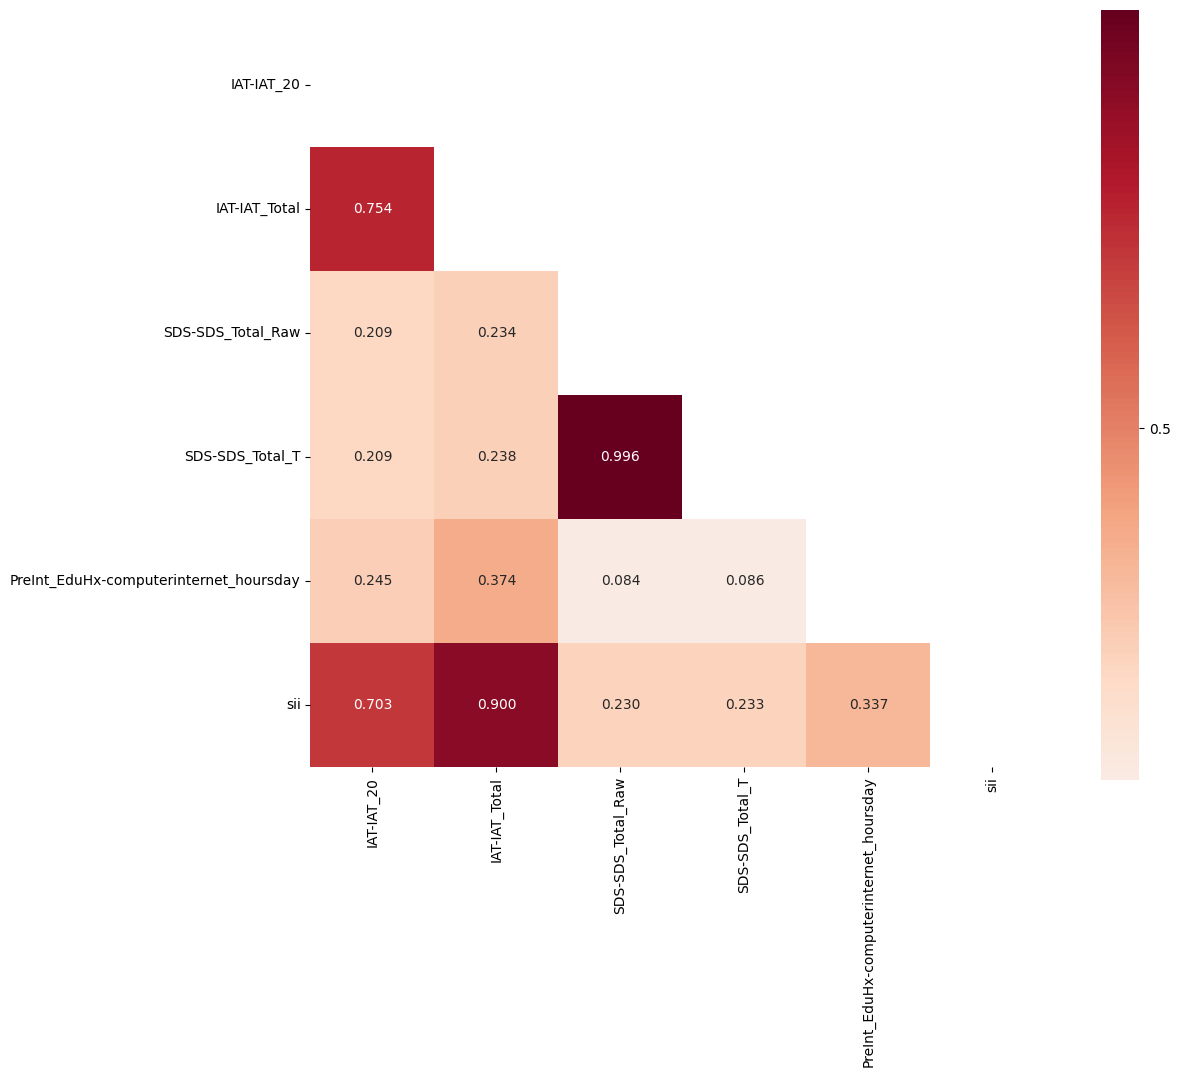

In [78]:
sds_hourday = df_c.iloc[:,24:]
# check correlation
sds_corr = sds_hourday.corr()
mask = np.triu(np.ones_like(sds_corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(sds_corr, 
           annot=True, 
           fmt='.3f', 
           cmap='RdBu_r', 
           center=0,           
           square=True, 
           xticklabels=True,
           yticklabels=True,
           mask=mask,
           cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1]})
plt.show()

In [79]:
sds_col = [col for col in df_c.columns if 'sds' in col.lower()]
print(sds_col)
df_c.drop(columns=sds_col, inplace=True)
df_c.info()

['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   Physical-BMI                            3022 non-null   float64
 3   Physical-Height                         3027 non-null   float64
 4   Physical-Weight                         3076 non-null   float64
 5   IAT-IAT_01                              2733 non-null   float64
 6   IAT-IAT_02                              2734 non-null   float64
 7   IAT-IAT_03                              2731 non-null   float64
 8   IAT-IAT_04                              2731 non-null   float64
 9   IAT-IAT_05                              2729 non-null   float64
 10  IAT-IAT_06         

In [80]:
corr_to_sii = df_c.corr()['sii']

In [81]:
corr_to_sii

Basic_Demos-Age                           0.365990
Basic_Demos-Sex                          -0.100148
Physical-BMI                              0.221125
Physical-Height                           0.373530
Physical-Weight                           0.325938
IAT-IAT_01                                0.617883
IAT-IAT_02                                0.694597
IAT-IAT_03                                0.694736
IAT-IAT_04                                0.589342
IAT-IAT_05                                0.722722
IAT-IAT_06                                0.645596
IAT-IAT_07                                0.460864
IAT-IAT_08                                0.695458
IAT-IAT_09                                0.660485
IAT-IAT_10                                0.689972
IAT-IAT_11                                0.609964
IAT-IAT_12                                0.370844
IAT-IAT_13                                0.705679
IAT-IAT_14                                0.675953
IAT-IAT_15                     

In [82]:
# select just column with correlation >0.3
df_c = df_c[corr_to_sii[abs(corr_to_sii) > 0.3].index.tolist()]

### **Semi-Supervised Leaning**

In [83]:
df_p = df_c.copy()


In [84]:
df_p = df_p[df_p['sii'].isnull()]
df_t = df_c.dropna(subset=['sii'])

<Figure size 1200x600 with 0 Axes>

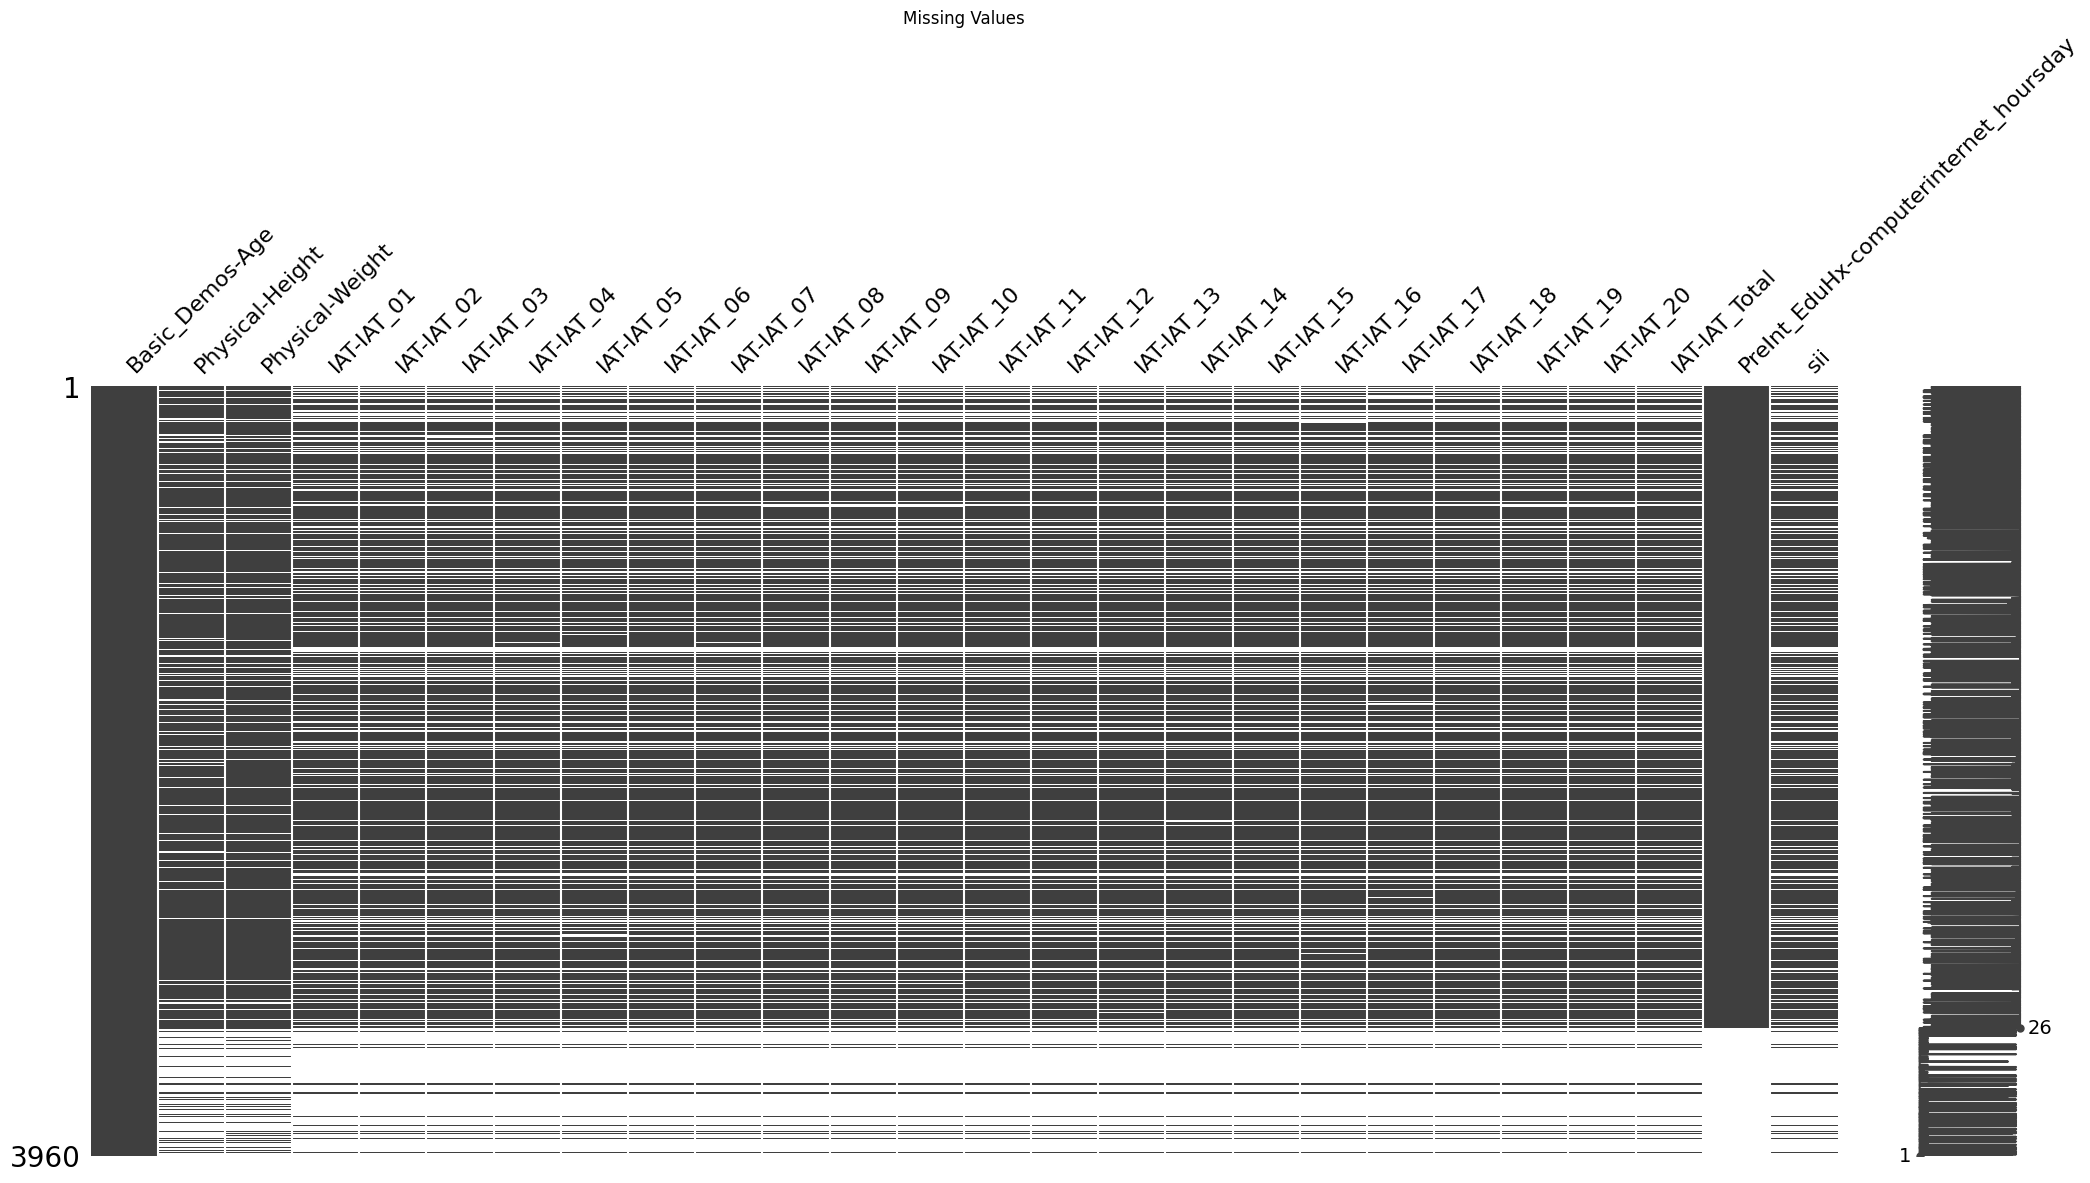

In [85]:
plt.figure(figsize=(12, 6))
msno.matrix(df_c.sort_values(
    by=['PreInt_EduHx-computerinternet_hoursday'], 
    ascending=False))
plt.title('Missing Values')
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_t.drop(columns='sii'), df_t['sii'], test_size=0.2, random_state=RANDOM_SEED)
train_labeled = X_train.copy()
train_labeled['sii'] = y_train
heldout = X_test.copy()
heldout['sii'] = y_test


In [87]:
train_labeled[train_labeled['sii'].isna()]

,Basic_Demos-Age,Physical-Height,Physical-Weight,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,PreInt_EduHx-computerinternet_hoursday,sii


In [88]:
train_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 350 to 1247
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         2188 non-null   int64  
 1   Physical-Height                         2029 non-null   float64
 2   Physical-Weight                         2062 non-null   float64
 3   IAT-IAT_01                              2187 non-null   float64
 4   IAT-IAT_02                              2188 non-null   float64
 5   IAT-IAT_03                              2186 non-null   float64
 6   IAT-IAT_04                              2186 non-null   float64
 7   IAT-IAT_05                              2185 non-null   float64
 8   IAT-IAT_06                              2186 non-null   float64
 9   IAT-IAT_07                              2184 non-null   float64
 10  IAT-IAT_08                              2185 non-null   float64

In [89]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=RANDOM_SEED, max_iter=10, initial_strategy='mean', sample_posterior=True)
train_imputed = pd.DataFrame(imputer.fit_transform(train_labeled), columns=train_labeled.columns)
heldout_imputed = pd.DataFrame(imputer.transform(heldout), columns=heldout.columns)
train_imputed['sii'] = train_labeled['sii'].values
heldout_imputed['sii'] = heldout['sii'].values

In [90]:
df_p = pd.DataFrame(imputer.transform(df_p), columns=df_p.columns)
df_p['sii'] = np.nan

In [91]:
iat_col = df_c.iloc[:,3:23].columns.tolist()

computer_hours_col = 'PreInt_EduHx-computerinternet_hoursday'

def clip_round(x):
    if x.name == 'IAT-IAT_Total':
        return np.round(x)
    elif x.name in iat_col:
        return np.clip(round(x), 0, 5)
    elif x.name == computer_hours_col:
        return np.clip(round(x), 0, 3)
    else:
        return x

In [92]:
train_imputed = train_imputed.apply(clip_round)
heldout_imputed = heldout_imputed.apply(clip_round)
df_p = df_p.apply(clip_round)

In [93]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         1224 non-null   float64
 1   Physical-Height                         1224 non-null   float64
 2   Physical-Weight                         1224 non-null   float64
 3   IAT-IAT_01                              1224 non-null   float64
 4   IAT-IAT_02                              1224 non-null   float64
 5   IAT-IAT_03                              1224 non-null   float64
 6   IAT-IAT_04                              1224 non-null   float64
 7   IAT-IAT_05                              1224 non-null   float64
 8   IAT-IAT_06                              1224 non-null   float64
 9   IAT-IAT_07                              1224 non-null   float64
 10  IAT-IAT_08                              1224 non-null   floa

In [94]:
# def iat_total(row):
#     return row[iat_col].sum()

In [95]:
# df_p['IAT-IAT_Total'] = df_p.apply(iat_total, axis=1)
# train_imputed['IAT-IAT_Total'] = train_imputed.apply(iat_total, axis=1)
# heldout_imputed['IAT-IAT_Total'] = heldout_imputed.apply(iat_total, axis=1)

In [96]:
# df_p.to_csv('unlabeled_imputed.csv', index=False)
# train_imputed.to_csv('train_imputed.csv', index=False)
# heldout_imputed.to_csv('heldout_imputed.csv', index=False)

In [97]:
df_obj = df.select_dtypes(include=['object']).columns
df_num = df.columns[~df.columns.isin(df_obj)]

In [98]:
train_imputed.sample(5)

,Basic_Demos-Age,Physical-Height,Physical-Weight,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,PreInt_EduHx-computerinternet_hoursday,sii
571,6.0,47.0,62.6,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,19.0,1.0,0.0
1317,9.0,55.0,74.4,2.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,0.0,0.0
2116,17.0,63.5,111.4,4.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0,34.0,1.0,1.0
1563,8.0,53.5,66.8,4.0,1.0,5.0,2.0,5.0,4.0,0.0,4.0,1.0,2.0,4.0,0.0,1.0,0.0,3.0,1.0,4.0,1.0,3.0,2.0,47.0,0.0,1.0
1146,6.0,47.2,45.8,4.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,14.0,0.0,0.0


In [99]:
train_imputed.sample(5)

,Basic_Demos-Age,Physical-Height,Physical-Weight,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,PreInt_EduHx-computerinternet_hoursday,sii
2066,12.0,59.000000,94.6,3.0,4.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,35.0,2.0,1.0
1672,8.0,47.669156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
315,17.0,70.500000,123.4,3.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,38.0,3.0,1.0
683,7.0,53.000000,70.8,4.0,4.0,4.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,4.0,3.0,4.0,2.0,0.0,34.0,2.0,1.0
764,9.0,58.500000,79.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [101]:
df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,IAT-Season,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df.tail()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,IAT-Season,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,NaN,NaN,NaN,NaN,Fall,16.0,0.0,18.0,1.0,19.9,2.0,10.0,1.0,8.0,1.0,9.0,1.0,12.0,1.0,Fall,3.0,4.52277,16.3642,1206.88,2051.70,19.4611,70.8117,14.0629,2.30138,11.58830,1.0,33.3709,17.9797,66.2889,29.7790,52.8320,NaN,NaN,Winter,3.260,Winter,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,27.0,60.0,78.0,118.0,NaN,NaN,NaN,NaN,Spring,0.0,0.0,NaN,NaN,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,2.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,NaN,79.0,99.0,116.0,NaN,NaN,NaN,NaN,Winter,15.0,1.0,18.5,2.0,15.8,2.0,0.0,0.0,10.0,1.0,10.0,1.0,14.0,1.0,Winter,2.0,4.41305,21.4438,1253.74,2005.99,20.4825,75.8033,14.8043,6.63952,33.99670,2.0,33.9805,21.3403,71.3903,28.7792,54.4630,NaN,NaN,Winter,2.729,Winter,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,NaN,59.0,61.0,113.0,NaN,NaN,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,4.0,6.66168,12.2372,1414.34,2970.12,26.5323,92.9092,13.0684,-0.83117,-5.90917,2.0,41.3715,25.0054,86.2475,45.4340,67.9038,NaN,NaN,Spring,3.300,Spring,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0
3959,ffef538e,Spring,11,0,NaN,NaN,Winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,1.0,NaN


In [103]:
df.sample(5)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,IAT-Season,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
758,2d38b5c0,Winter,15,1,NaN,NaN,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,3.0,NaN
3216,cfbbdd3d,Spring,13,0,Fall,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,2.77,Spring,3.0,4.0,4.0,1.0,5.0,3.0,4.0,4.0,4.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,46.0,Spring,37.0,53.0,Spring,0.0,1.0
1277,4f0a07c6,Winter,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,NaN,NaN
141,08159c5e,Winter,17,1,Fall,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,1.52,NaN,NaN,Winter,1.0,2.0,4.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,NaN,0.0,2.0,0.0,26.0,Winter,30.0,43.0,Winter,2.0,0.0
647,26d541c2,Winter,10,1,Spring,45.0,Spring,21.292377,53.1,85.4,NaN,102.0,89.0,149.0,Spring,4.0,5.0,15.0,Spring,0.0,0.0,8.1,1.0,9.1,1.0,0.0,0.0,7.5,0.0,8.0,0.0,6.0,0.0,Spring,3.0,6.57103,21.2947,1091.47,1746.35,18.6027,58.519,14.5919,6.70284,26.881,2.0,26.0718,13.8445,51.948,25.2204,44.6745,NaN,NaN,Spring,3.11,Spring,5.0,3.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,23.0,Spring,77.0,100.0,Winter,0.0,0.0


In [104]:
train_imputed.head()

,Basic_Demos-Age,Physical-Height,Physical-Weight,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,PreInt_EduHx-computerinternet_hoursday,sii
0,5.0,49.000000,59.0,4.0,3.0,4.0,0.0,4.0,0.0,0.0,2.0,1.0,3.0,2.0,0.0,4.0,1.0,3.0,4.0,2.0,4.0,3.0,1.0,45.0,1.0,1.0
1,6.0,50.250000,64.2,3.0,3.0,3.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,0.0,30.0,2.0,0.0
2,9.0,48.500000,46.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,53.801413,0.0,4.0,4.0,4.0,4.0,3.0,1.0,1.0,2.0,3.0,5.0,4.0,0.0,5.0,5.0,4.0,5.0,1.0,5.0,1.0,2.0,63.0,2.0,2.0
4,14.0,61.000000,97.2,5.0,5.0,4.0,4.0,4.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,3.0,4.0,4.0,5.0,4.0,4.0,56.0,3.0,2.0


In [105]:
df_c = df.copy()
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [106]:
filtered_non_binary = [col for col in df_c.columns if df_c[col].nunique() > 2 and df_c[col].dtype != 'object' and col not in ['id']]


In [107]:
info_df = pd.concat([
    pd.DataFrame(df_c[filtered_non_binary].count(), columns=['NonNullCount']),
    pd.DataFrame(df_c[filtered_non_binary].dtypes, columns=['DataType']),
    pd.DataFrame(df_c[filtered_non_binary].corrwith(df_c['sii']), columns=['CorrelationWithSII'])
    ], axis=1)
info_df.reset_index(inplace=True, names=['ColumnName'])


In [108]:
info_df[info_df['CorrelationWithSII'].abs() > 0.3]

,ColumnName,NonNullCount,DataType,CorrelationWithSII
0,Basic_Demos-Age,3960,int64,0.365990
3,Physical-Height,3027,float64,0.373530
4,Physical-Weight,3076,float64,0.325938
39,IAT-IAT_01,2733,float64,0.617883
40,IAT-IAT_02,2734,float64,0.694597
41,IAT-IAT_03,2731,float64,0.694736
42,IAT-IAT_04,2731,float64,0.589342
43,IAT-IAT_05,2729,float64,0.722722
44,IAT-IAT_06,2732,float64,0.645596
45,IAT-IAT_07,2729,float64,0.460864
